**Modulo 3: TensorFlow y Keras para Neural Networks**
* Instructor: [Juan Maniglia](https://juanmaniglia.github.io)

# Parte 3.2: Introducción a Tensorflow y Keras

TensorFlow es una biblioteca de software de código abierto para Machine_Learning en varios tipos de tareas de percepción y comprensión del lenguaje. Actualmente, diferentes equipos lo utilizan tanto para la investigación como para la producción en muchos productos comerciales de Google, como reconocimiento de voz, Gmail, Google Photos y búsqueda, muchos de los cuales habían utilizado anteriormente su predecesor DistBelief. TensorFlow fue desarrollado originalmente por el equipo de Google Brain para fines de investigación y producción de Google y luego se lanzó bajo la licencia de código abierto Apache 2.0 el 9 de noviembre de 2015.

* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)


## ¿Por qué TensorFlow?

* Cuenta con el apoyo de Google
* Funciona bien en Windows, Linux y Mac
* Excelente soporte de GPU
* Python es un lenguaje de programación fácil de aprender
* Python es extremadamente popular en la comunidad de ciencia de datos

## Deep Learning Tools
TensorFlow no es el único juego de la ciudad. El mayor competidor de TensorFlow/Keras es PyTorch. A continuación se enumeran algunos de los kits de herramientas de aprendizaje profundo que se admiten activamente:

* **[TensorFlow](https://www.tensorflow.org/)** - API de aprendizaje profundo de Google.
* **[Keras](https://keras.io/)** - También de Google, framework de mayor nivel que permite el uso de TensorFlow, MXNet y Theano indistintamente.
* **[PyTorch](https://pytorch.org/)** - PyTorch es una biblioteca de aprendizaje automático de código abierto basada en la biblioteca Torch, que se utiliza para aplicaciones como la visión artificial y el procesamiento del lenguaje natural. Está desarrollado principalmente por el laboratorio de investigación de IA de Facebook. 

Otros deep learning tools:

* **[MXNet](https://mxnet.incubator.apache.org/)** API de aprendizaje profundo de la fundación Apache. Se puede utilizar a través de Keras.
* **[Torch](http://torch.ch/)** es utilizado por Google DeepMind, Facebook AI Research Group, IBM, Yandex y el Idiap Research Institute. Se ha utilizado para algunos de los proyectos de aprendizaje profundo más avanzados del mundo.
* **[PaddlePaddle](https://github.com/baidu/Paddle)** - [Baidu](http://www.baidu.com/)'s deep learning API.
* **[Deeplearning4J](http://deeplearning4j.org/)** - Basado en Java. Soporta todas las plataformas principales. ¡Soporte de GPU en Java!
* **[Computational Network Toolkit (CNTK)](https://github.com/Microsoft/CNTK)** -Microsoft. Soporte para Windows/Linux, solo línea de comando. Enlaces para predicciones para C#/Python. Soporte de GPU
* **[H2O](http://www.h2o.ai/)** - Basado en Java. Soporta todas las plataformas principales. Soporte limitado para visión artificial. Sin soporte para GPU.

## Uso TensorFlow Directamente

La mayor parte del tiempo en el curso, nos comunicaremos con TensorFlow usando Keras, que le permite especificar el número de capas ocultas y crear la red neuronal. TensorFlow es una API matemática de bajo nivel, similar a [Numpy](http://www.numpy.org/).  Sin embargo, a diferencia de Numpy, TensorFlow está diseñado para el aprendizaje profundo. TensorFlow compila estos gráficos de cómputo en gráficos altamente eficientes C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.

### TensorFlow Ejemplos de álgebra lineal

TensorFlow es una biblioteca para álgebra lineal. Keras es una abstracción de alto nivel para las redes neuronales que construyes sobre TensorFlow. En esta sección, demostraré algo de álgebra lineal básica que emplea TensorFlow directamente y no utiliza Keras. Primero, veremos cómo multiplicar una matriz de filas y columnas.

In [1]:
import tensorflow as tf

# Cree una operación constante que produzca una matriz de 1x2. la operación es
# agregado como un nodo al gráfico predeterminado.
#
# El valor devuelto por el constructor representa la salida
# de la constante op.
matrix1 = tf.constant([[3., 3.]])

# Cree otra constante que produzca una matriz de 2x1.
matrix2 = tf.constant([[2.],[2.]])

# Cree una operación de Matmul que tome 'matrix1' y 'matrix2' como entradas.
# El valor devuelto, 'producto', representa el resultado de la matriz
# multiplicación.
producto = tf.matmul(matrix1, matrix2)

print(producto)
print(float(producto))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


Este ejemplo multiplicó dos tensores constantes de TensorFlow. A continuación, veremos cómo restar una constante de una variable.

In [2]:
import tensorflow as tf

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Agregue una operación para restar 'a' de 'x'. Ejecútalo e imprime el resultado.
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


Por supuesto, las variables solo son útiles si sus valores se pueden cambiar. El programa puede lograr este cambio de valor llamando a la función de asignación.

In [3]:
x.assign([4.0, 6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>


El programa ahora puede realizar la resta con este nuevo valor.

In [4]:
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]



En la siguiente sección, veremos un ejemplo de TensorFlow que no tiene nada que ver con las redes neuronales.

### TensorFlow Mandelbrot Set Ejemplo

A continuación, examinamos otro ejemplo en el que usamos TensorFlow directamente. Para demostrar que TensorFlow es matemático y no solo proporciona redes neuronales, también lo usaremos primero para una tarea de representación que no sea de aprendizaje automático.

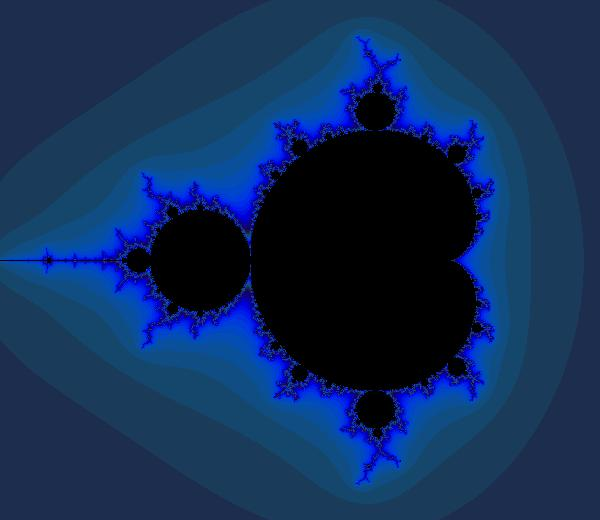

In [6]:
# Importar librarias para la simulación
import tensorflow as tf
import numpy as np

# Importar para visualización
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """Muestra una matriz de recuentos de iteraciones como un
     imagen colorida de un fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

# Use NumPy para crear una matriz 2D de números complejos

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



for i in range(200):
    # CCalcular los nuevos valores de z: z^2 + x
    zs_ = zs*zs + xs

    # ¿Hemos divergido con este nuevo valor?
    not_diverged = tf.abs(zs_) < 4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    
DisplayFractal(ns.numpy())

El renderizado de Mandlebrot es simple e infinitamente complejo al mismo tiempo. Esta vista muestra todo el universo de Mandlebrot al mismo tiempo, ya que está completamente alejado. Sin embargo, si hace zoom en cualquier parte del gráfico que no sea negra, encontrará una complejidad oculta infinita.

### Introducción a Keras

[Keras](https://keras.io/) es una capa superior Tensorflow que facilita mucho la creación de redes neuronales. En lugar de definir los gráficos, como ve arriba, configura las capas individuales de la red con una API de mucho más alto nivel. A menos que esté realizando una investigación sobre estructuras completamente nuevas de redes neuronales profundas, es poco probable que necesite programar TensorFlow directamente.  

**Para esta clase, usaremos TensorFlow a través de Keras, en lugar de TensorFlow directo.**

### Simple regresión con TensorFlow: MPG

Este ejemplo muestra cómo codificar el conjunto de datos MPG para la regresión. Este conjunto de datos es un poco más complicado que Iris, porque:

* La entrada tiene tanto numérico como categórico
* La entrada tiene valores faltantes

Este ejemplo utiliza funciones definidas anteriormente en este notebook, las "funciones_de_ayuda". Estas funciones le permiten construir el vector de características para una red neuronal. Considera lo siguiente:

* Predictores/Entradas
    * Rellene las entradas faltantes con la mediana de esa columna. Utilice **missing_median**.
    * Codifique valores textuales/categóricos con **encode_text_dummy**.
    * Codifique valores numéricos con **encode_numeric_zscore**.
* Producción
    * Descartar filas con salidas faltantes.
    * Codificar valores textuales/categóricos con **encode_text_index**.
    * No codificar valores numéricos de salida.
* Producir vectores de características finales (x) y salida esperada (y) con **to_xy**.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Tratado de missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas a Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Construir la red neural
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Oculta 1
model.add(Dense(10, activation='relu')) # Oculta 2
model.add(Dense(1)) # Salida
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
13/13 - 0s - loss: 222.1605 - 338ms/epoch - 26ms/step
Epoch 2/100
13/13 - 0s - loss: 180.5455 - 35ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 153.6098 - 37ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 130.1387 - 27ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 119.5372 - 28ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 116.7377 - 27ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 110.6803 - 28ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 89.0653 - 27ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 91.8128 - 27ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 80.1005 - 27ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 76.2340 - 27ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 75.6091 - 29ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 69.3065 - 28ms/epoch - 2ms/step
Epoch 14/100
13/13 - 0s - loss: 71.4853 - 29ms/epoch - 2ms/step
Epoch 15/100
13/13 - 0s - loss: 66.0467 - 27ms/epoch - 2ms/step
Epoch 16/100
13/13 - 0s - loss: 62.6465 

### Introducción a los hiperparámetros de redes neuronales

Si observa el código anterior, verá que la red neuronal contiene cuatro capas. La primera capa es la capa de entrada porque contiene el parámetro **input_dim** que el programador establece como el número de entradas que tiene el conjunto de datos. La red necesita una neurona de entrada para cada columna del dataset (incluidas las variables ficticias).

También hay varias capas ocultas, con 25 y 10 neuronas cada una. Quizás se pregunte cómo el programador eligió estos números. Seleccionar una estructura neuronal oculta es una de las preguntas más comunes sobre las redes neuronales. Desafortunadamente, no hay una respuesta correcta. Estos son hiperparámetros. Son configuraciones que pueden afectar el rendimiento de la red neuronal, pero no hay un medio claramente definido para configurarlas.

En general, más neuronas ocultas significan más capacidad para adaptarse a problemas complejos. Sin embargo, demasiadas neuronas pueden provocar Overfitting y largos tiempos de entrenamiento. Muy pocos pueden dar lugar a una adaptación insuficiente del problema y sacrificarán la precisión. Además, cuántas capas tiene es otro hiperparámetro. En general, más capas permiten que la red neuronal pueda realizar más de su ingeniería de características y preprocesamiento de datos. Pero esto también se produce a expensas de los tiempos de entrenamiento y el riesgo de Overfitting. En general, verá que los recuentos de neuronas comienzan más cerca de la capa de entrada y tienden a reducirse hacia la capa de salida en una especie de forma triangular.

### Controlar la cantidad de salida

El programa produce una línea de salida para cada época de entrenamiento. Puede eliminar esta salida configurando la configuración detallada del comando de ajuste:

* **verbose=0** - Sin salida de progreso (utilice con Jupyter si no desea salida)
* **verbose=1** - Muestra la barra de progreso, no funciona bien con Jupyter
* **verbose=2** - Resumen de resultados de progreso (úselo con Jupyter si desea conocer la pérdida en cada época)

### Predicción de regresión

A continuación, realizaremos predicciones reales. El programa asigna estas predicciones a la variable **pred**. Estas son todas las predicciones de MPG de la red neuronal. ¿Observe que se trata de una matriz 2D? Siempre puede ver las dimensiones de lo que Keras devuelve imprimiendo **pred.shape**. Las redes neuronales pueden devolver múltiples valores, por lo que el resultado siempre es una matriz. Aquí, la red neuronal solo devuelve un valor por predicción (hay 398 autos, por lo que 398 predicciones). Sin embargo, se necesita un rango 2D porque la red neuronal tiene el potencial de devolver más de un valor.  

In [8]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (398, 1)
[[15.588783]
 [15.046434]
 [16.291985]
 [16.862738]
 [15.839203]
 [10.71751 ]
 [10.811102]
 [10.873663]
 [10.921455]
 [13.424355]]


Nos gustaría ver qué tan buenas son estas predicciones. Sabemos cuál es el MPG correcto para cada automóvil, por lo que podemos medir qué tan cerca estaba la red neuronal.

In [9]:
# Medir error RMSE. RMSE es común para la regresión.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 3.6251872357964077


El número impreso arriba es la cantidad promedio en la que las predicciones estuvieron por encima o por debajo del resultado esperado. También podemos imprimir los primeros diez autos, con predicciones y MPG real.

In [10]:
# Ejemplos de predicciones
for i in range(10):
    print(f"{i+1}. Nombre del Coche: {cars[i]}, MPG: {y[i]}, " 
          + f"predicted MPG: {pred[i]}")

1. Nombre del Coche: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: [15.588783]
2. Nombre del Coche: buick skylark 320, MPG: 15.0, predicted MPG: [15.046434]
3. Nombre del Coche: plymouth satellite, MPG: 18.0, predicted MPG: [16.291985]
4. Nombre del Coche: amc rebel sst, MPG: 16.0, predicted MPG: [16.862738]
5. Nombre del Coche: ford torino, MPG: 17.0, predicted MPG: [15.839203]
6. Nombre del Coche: ford galaxie 500, MPG: 15.0, predicted MPG: [10.71751]
7. Nombre del Coche: chevrolet impala, MPG: 14.0, predicted MPG: [10.811102]
8. Nombre del Coche: plymouth fury iii, MPG: 14.0, predicted MPG: [10.873663]
9. Nombre del Coche: pontiac catalina, MPG: 14.0, predicted MPG: [10.921455]
10. Nombre del Coche: amc ambassador dpl, MPG: 15.0, predicted MPG: [13.424355]


### Clasificación simple de TensorFlow: Iris

La clasificación es el proceso mediante el cual una red neuronal intenta clasificar la entrada en una o más clases. La forma más sencilla de evaluar una red de clasificación es rastrear el porcentaje de elementos del conjunto de entrenamiento que se clasificaron incorrectamente. Por lo general, calificamos los resultados humanos de esta manera. Por ejemplo, es posible que haya realizado exámenes de opción múltiple en la escuela en los que tuvo que sombrear una burbuja para las opciones A, B, C o D. Si elige la letra incorrecta en un examen de 10 preguntas, obtendrá un 90%. De la misma manera, podemos calificar las computadoras; sin embargo, la mayoría de los algoritmos de clasificación no eligen simplemente A, B, C o D. Las computadoras generalmente informan una clasificación como su porcentaje de confianza en cada clase. La Figura 3.EXAM muestra cómo una computadora y un ser humano podrían responder a la pregunta número 1 en un examen.

**Figure 3.EXAM: Classification Neural Network Output**
![Classification Neural Network Output](images/class-multi-choice.png "Classification Neural Network Output")

Como puede ver, el examinador humano marcó la primera pregunta como "B". Sin embargo, el examinado por computadora tenía un 80 % (0,8) de confianza en "B" y también estaba algo seguro con un 10 % (0,1) en "A". Luego, la computadora distribuyó los puntos restantes en los otros dos. En el sentido más simple, la máquina obtendría el 80 % de la puntuación de esta pregunta si la respuesta correcta fuera "B". La computadora obtendría solo el 5% (0.05) de los puntos si la respuesta correcta fuera "D".

Lo que acabamos de ver es un ejemplo sencillo de cómo realizar la clasificación de Iris usando TensorFlow. Se usa el archivo iris.csv, en lugar de usar los datos integrados que requieren muchos de los ejemplos de Google.  

**Asegúrese de ejecutar siempre bloques de código anteriores. Si ejecuta el bloque de código a continuación, sin el bloque de código anterior, obtendrá errores**

In [11]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convertir a numpy - Clasificación
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classificación
species = dummies.columns
y = dummies.values


# Construir la red neuronal
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Oculta 1
model.add(Dense(25, activation='relu')) # Oculta 2
model.add(Dense(y.shape[1],activation='softmax')) # Salida

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
5/5 - 0s - loss: 1.3552 - 242ms/epoch - 48ms/step
Epoch 2/100
5/5 - 0s - loss: 1.1389 - 15ms/epoch - 3ms/step
Epoch 3/100
5/5 - 0s - loss: 1.0251 - 16ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 0.9514 - 17ms/epoch - 3ms/step
Epoch 5/100
5/5 - 0s - loss: 0.8955 - 16ms/epoch - 3ms/step
Epoch 6/100
5/5 - 0s - loss: 0.8420 - 18ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 0.7980 - 17ms/epoch - 3ms/step
Epoch 8/100
5/5 - 0s - loss: 0.7535 - 16ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 0.7139 - 17ms/epoch - 3ms/step
Epoch 10/100
5/5 - 0s - loss: 0.6757 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.6411 - 16ms/epoch - 3ms/step
Epoch 12/100
5/5 - 0s - loss: 0.6102 - 13ms/epoch - 3ms/step
Epoch 13/100
5/5 - 0s - loss: 0.5808 - 12ms/epoch - 2ms/step
Epoch 14/100
5/5 - 0s - loss: 0.5562 - 13ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 0.5341 - 12ms/epoch - 2ms/step
Epoch 16/100
5/5 - 0s - loss: 0.5139 - 13ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 0

In [12]:
# Imprimir el número de especies encontradas:

print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


Ahora que tiene un entrenamiento de red neuronal, nos gustaría poder usarlo. El siguiente código hace uso de nuestra red neuronal. Exactamente como antes, generaremos predicciones. Observe que vuelven tres valores para cada una de las 150 flores de iris. Había tres tipos de iris (Iris-setosa, Iris-versicolor e Iris-virginica).

In [13]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (150, 3)
[[9.96728659e-01 3.27128102e-03 2.53017216e-08]
 [9.91585255e-01 8.41462333e-03 1.49150893e-07]
 [9.94830191e-01 5.16966265e-03 9.47089234e-08]
 [9.90646124e-01 9.35364701e-03 2.78289463e-07]
 [9.97087419e-01 2.91259773e-03 2.45902338e-08]
 [9.96406496e-01 3.59352934e-03 2.21737206e-08]
 [9.94559228e-01 5.44067845e-03 1.30652865e-07]
 [9.95159090e-01 4.84086853e-03 5.43411645e-08]
 [9.88472879e-01 1.15266778e-02 5.21418315e-07]
 [9.92857814e-01 7.14205066e-03 1.06054294e-07]]


Si desea desactivar la notación científica, puede utilizar la siguiente línea:

In [14]:
np.set_printoptions(suppress=True)

Ahora vemos estos valores redondeados.

In [15]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


Por lo general, el programa considera que la columna con la predicción más alta es la predicción de la red neuronal. Es fácil convertir las predicciones a las especies de iris esperadas. La función argmax encuentra el índice de la predicción máxima para cada fila.

In [16]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Por supuesto, es sencillo volver a convertir estos índices en especies de iris. Usamos la lista de especies que creamos anteriormente.

In [17]:
print(species[predict_classes[1:10]])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


La precisión podría ser una métrica de error más fácil de entender. Es esencialmente un puntaje de prueba. Para todas las predicciones del iris, ¿qué porcentaje fue correcto? La desventaja es que no considera la confianza de la red neuronal en cada predicción.

In [18]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.98


El siguiente código realiza dos predicciones ad hoc. La primera predicción es simplemente una sola flor de iris y la segunda predice dos flores de iris. ¿Observe que el argmax en la segunda predicción requiere **axis=1**? Dado que ahora tenemos una matriz 2D, debemos especificar qué eje tomará el argmax. El valor **axis=1** especifica que queremos el índice de columna máximo para cada fila.

In [20]:
ejemplo_flor = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(ejemplo_flor)
print(pred)
pred = np.argmax(pred)
print(f"La predicción parea {ejemplo_flor} is: {species[pred]}")

[[0.00051492 0.17222434 0.8272607 ]]
La predicción parea [[5. 3. 4. 2.]] is: Iris-virginica



También puede predecir dos flores de muestra.

In [22]:
ejemplo_flor = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]],\
        dtype=float)
pred = model.predict(ejemplo_flor)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"La predicción para las dos flores {ejemplo_flor} ")
print(f"Es: {species[pred]}")

[[0.00051492 0.17222425 0.8272608 ]
 [0.9890956  0.01090409 0.00000023]]
La predicción para las dos flores [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] 
Es: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')
